<a href="https://colab.research.google.com/github/sreekar-pasumarthi/Deep-Learning-Projects/blob/master/glass_Kfold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical, normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.models import Sequential
from keras.layers import Dense

In [0]:
df_train = pd.read_csv('https://raw.githubusercontent.com/sreekar-pasumarthi/Deep-Learning-Projects/master/glass/glass.csv')
print(f'The train set contain {df_train.shape[0]} examples')
print(f'The train set contain {df_train.shape[1]} features')
df_train.head()#to select first n rows

The train set contain 214 examples
The train set contain 10 features


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [0]:
X_train = df_train.drop('Type', axis = 1)#drops the column type from the dataframe
y_train = df_train['Type']#selects only the last column from the dataframe

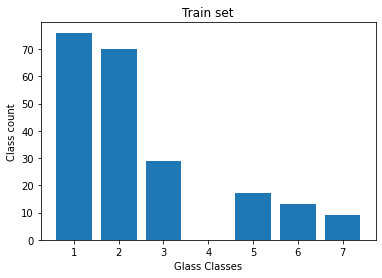

In [0]:
glass_classes = y_train.unique()#no. of classes 
values = y_train.value_counts()#occurrence of each class

plt.bar(glass_classes, values)
plt.title('Train set')
plt.xlabel('Glass Classes')
plt.ylabel('Class count')
plt.show()

In [0]:
X_train.describe()#to describe the data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [0]:
X_train = df_train.values #to convert it to array and then normalise
X_train = normalize(X_train)#rescaling the data between 0 and 1
print(X_train[0])

[2.06227172e-02 1.84938864e-01 6.08779693e-02 1.49144245e-02
 9.73233994e-01 8.13514066e-04 1.18637468e-01 0.00000000e+00
 0.00000000e+00 1.35585678e-02]


In [0]:
y_train = to_categorical(y_train)#to convert y_train into to 'one hot vector'
y_train.shape

(214, 8)

In [0]:
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(10, input_dim=10, activation='relu'))
	model.add(Dense(8, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [45]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=20, verbose=0)
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X_train, y_train, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


Baseline: 33.66% (12.34%)
